In [378]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Dataset

In this homework, we will use the California Housing Prices data from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task.

Features

For the rest of the homework, you'll need to use only these columns:

- `'latitude'`,
- `'longitude'`,
- `'housing_median_age'`,
- `'total_rooms'`,
- `'total_bedrooms'`,
- `'population'`,
- `'households'`,
- `'median_income'`,
- `'median_house_value'`,
- `'ocean_proximity'`

Data preparation

- Select only the features from above and fill in the missing values with 0.
- Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.
- Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
- Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [379]:
url ='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

filename = 'housing.csv'

urllib.request.urlretrieve(url, filename)

('housing.csv', <http.client.HTTPMessage at 0x1bb8acba7a0>)

In [380]:
df = pd.read_csv('housing.csv')

In [381]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [382]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [383]:
df.total_bedrooms.fillna(0, inplace=True)

In [384]:
df['rooms_per_household'] = (df['total_rooms'] / df['households'])
df['bedrooms_per_room'] = (df['total_bedrooms'] / df['total_rooms'])
df['population_per_household'] = (df['population'] / df['households'])

In [385]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:

- NEAR BAY
- <1H OCEAN
- INLAND
- NEAR OCEAN

Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
- Make sure that the target value (`median_house_value`) is not in your dataframe.

In [386]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [387]:
df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

#### Answer:  <1H OCEAN

In [388]:
from sklearn.model_selection import train_test_split

In [389]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [390]:
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=42)

In [391]:
len(df_train), len(df_test), len(df_val)

(12384, 4128, 4128)

In [392]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [393]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [394]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [395]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [396]:
y_train

array([241400., 500001.,  64100., ..., 215300., 139000., 181300.])

## Question 2

- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

Options:

- `total_bedrooms` and `households`
- `total_bedrooms` and `total_rooms`
- `population` and `households`
- `population_per_household` and `total_rooms`

Make `median_house_value` binary

- We need to turn the `median_house_value` variable from numeric into binary.
- Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [397]:
df_corr = df_train.corr()

In [398]:
import seaborn as sn
import matplotlib.pyplot as plt

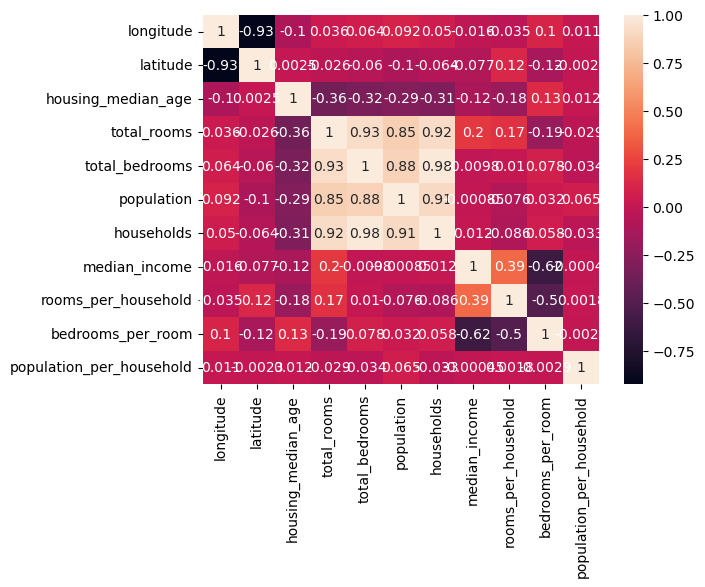

In [399]:
sn.heatmap(df_corr, annot=True)
plt.show()

#### Answer:   total_bedrooms and households

Make median_house_value binary

We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [400]:
above_average = (y_train > y_train.mean()).astype(int)

In [401]:
above_average

array([1, 1, 0, ..., 1, 0, 0])

In [402]:
y_train_aa = (y_train > y_train.mean()).astype(int)
y_val_aa = (y_val > y_val.mean()).astype(int)
y_test_aa = (y_test > y_test.mean()).astype(int)

In [403]:
y_test_aa

array([0, 0, 1, ..., 1, 0, 0])

In [404]:
y_val_aa

array([0, 0, 1, ..., 1, 1, 0])

In [405]:
y_test_aa

array([0, 0, 1, ..., 1, 0, 0])

## - Question 3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

Options:

- 0.263
- 0.00001
- 0.101
- 0.15555

In [406]:
from sklearn.metrics import mutual_info_score

In [407]:
score = mutual_info_score(df_train.ocean_proximity, above_average)
score

0.10138385763624205

In [408]:
round(score, 2)

0.1

#### Answer 0.101

## Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

- 0.60
- 0.72
- 0.84
- 0.95

In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [410]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [411]:
categorical = ['ocean_proximity']
numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']

In [412]:
train_dict = df_train[['ocean_proximity']].to_dict('records')

In [413]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical + numerical].to_dict('records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict('records')
X_val = dv.transform(val_dicts)

In [414]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train_aa)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [415]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [416]:
accuracy = (y_val_aa == y_pred).mean()

In [417]:
round(accuracy, 2)

0.84

#### Answer: 0.84

## Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - `total_rooms`
    - `total_bedrooms`
    - `population`
    - `households`
    
note: the difference doesn't have to be positive

In [347]:
features = ['ocean_proximity',
  'longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'rooms_per_household',
  'bedrooms_per_room',
  'population_per_household']

In [348]:
for f in features:
    least_feat = features.copy()
    least_feat.remove(f)
    
    train_dict = df_train[least_feat].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[least_feat].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(f, accuracy - score, score)

ocean_proximity 0.7858527131782946 0.050872093023255814
longitude 0.7848837209302326 0.05184108527131783
latitude 0.7853682170542636 0.05135658914728682
housing_median_age 0.7834302325581396 0.05329457364341085
total_rooms 0.7846414728682171 0.052083333333333336
total_bedrooms 0.784156976744186 0.052567829457364344
population 0.7839147286821706 0.05281007751937984
households 0.7839147286821706 0.05281007751937984
median_income 0.7880329457364341 0.04869186046511628
rooms_per_household 0.7856104651162791 0.05111434108527132
bedrooms_per_room 0.7848837209302326 0.05184108527131783
population_per_household 0.784156976744186 0.052567829457364344


In [355]:
least = [0.052083333333333336, 0.052567829457364344, 0.05281007751937984, 0.05281007751937984]

In [356]:
print("Min: ", pd.Series(least).idxmin())

Min:  0


#### Answer: total_rooms

## Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
- This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:

- 0
- 0.01
- 0.1
- 1
- 10

In [441]:
y_train_log = y_train.copy()
y_val_log = y_val.copy()
y_test_log = y_test.copy()

In [442]:
y_train_log = np.log1p(y_train_log)
y_val_log = np.log1p(y_val_log)
y_test_log = np.log1p(y_test_log)

In [443]:
from sklearn.linear_model import Ridge

In [444]:
X_val[0]

array([ 1.59529807e-01,  1.82000000e+02,  3.50000000e+01,  3.67400000e+01,
       -1.19850000e+02,  3.53750000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.37000000e+02,
        2.95054945e+00,  6.54395604e+00,  1.90000000e+02,  1.19100000e+03])

In [457]:
a = [0, 0.01, 0.1, 1, 10]

for a in alpha:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    train_dicts = df_train[categorical + numerical].to_dict('records')
    X_train = dv.fit_transform(train_dicts)

    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train_log)

    val_dicts = df_val[categorical + numerical].to_dict('records')
    X_val = dv.transform(val_dicts)    

    y_pred = model.predict(X_val)

    rmse = ((y_val_log - y_pred) ** 2).mean() ** .5

    print(a, round(rmse, 3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524


#### Answer:  0